<center> <img src="logo_cesi.png" align="center" width="200px">

# Project deliverable

##### Group 3 

###### Members : 
- EGUE Funmilola
- LAVAUX Esteban
- VALLEMONT Hugo
- ROCHARD Léo


### Summary : 

Presentation of the project

Part I : Modelisation 

1 - Algorithmic complexity

2 - Mathematic modelisation

3 - Different algorithms in this case and algorithm comparison 

4 - Algorithm choice 

Partie II : Implementation and operation

1 - Algorithm’s implementation ( code)

2 - Demonstration of this implementation on multiple cases 

3 - Comprehensive experimental design demonstrating your algorithm’s performance (rename)

a - Performances

b - Limitations 

c - Prospects for improvement

### Presentation of the project

ADEME (French Environment and Energy Management Agency) has recently launched a call for expressions of interest to promote the execution of demos and experiments of new mobility solutions for people and goods, adapted to different kinds of territories.

Your CesiCDP structure is already well established in the field. With the help of many partners, you have carried out several studies on Smart Multimodal Mobility. New transport technologies, despite being more cost-effective and cleaner, also pose new challenges, particularly in terms of resource management optimization. But these transport logistics problems present a major challenge for the future: they can be applied in many areas (mail distribution, product delivery, road network maintenance, garbage collection) and their impact on the environment can be truly significant.

You are part of the team set up by CesiCDP to answer the call from ADEME. The challenge is to win new markets with very attractive financing schemes to keep developing your business activity.

CesiCDP decided to focus its study on the management of delivery routes. The algorithmic problem consists in calculating on a road network a route allowing to connect a subset of cities between them, then to return to its starting point, so as to minimize the total duration of the route. This optimization should take into account the expected traffic on each axis for the different time slots.

The idea is to propose a method from Operations Research to generate a delivery route corresponding to this problem.


## Part I : Modelisation

#### Problem modelisation 

In the course of this project, we first had to analyze the project in order to model it, and then find the best algorithmic model for solving this problem.
The aim is to create a solution in Python that will allow us to create a route on a road network to find the route that minimizes the total duration of the tour. Time is therefore our key parameter.
This route is a cycle that takes into account traffic and thus the travel time required to link several cities.
We represent it as a graph, with the edges (E) being the routes between two cities, and the vertices (V), giving us a graph G(V, E).  

#### Requirements chosen 

We decided to take the following constraint:
Each object has a specific collection point

In other words, we'll have a list of objects to collect at specific points. These objects must in turn be delivered to another specific location. This means that we need to recalculate the appropriate route for each object collected.


#### Modelisation

Without taking the additional constraint : 
In our problem, we're trying to optimize a route, so it's a NP-hard problem. 

Decision problem  
Is our problem a Hamiltonian cycle?  
Can we make our delivery man pass through each designated vertex of our graph?   

Optimization problem   
What is the shortest route for our deliveryman to complete his round?

### 1 - Algorithmic Complexity 


For a set of n! points, there are a total of n! possible paths. Since the starting point doesn't change the length of the path, it can be chosen arbitrarily, giving us (n - 1)! different paths. Finally, since each path can be traversed in two directions and both possibilities have the same length, we can divide this number by two. For example, if we name the points a, b, c and d, the paths abcd and dcba, cdab and badc, adcb and bcda, cbad and dabc all have the same length. Only the starting point and direction of travel change. There are therefore (( n - 1) !) / 2 candidate paths to consider.   


In [6]:
#code ici

### 2 - Mathematic modelisation

###### Variables :  
- I : List of cities
- x(i,j) : represents whether a city had been visited or not on the path , take the  values 1 or 0 
- w(i,j) : Represents the edge between deux points of the graph, i.e the time of traject between to cities   
##### Objective function :  
- ∑i∑j〖x(i,j) w(i,j) 〗 
##### Requirements  :  
- ∑i∑j (x(i,j)) = ∑i∑j (x(j,i) )  
- I!=I1  
- x'(i,j)=x(i,j)  


##### Problem's Data :  
A traffic matrix T, where T(i, j, h) represents the expected traffic level between cities vi and vj at time slot h.  
###### Decision variables :  
- A binary variable x(i, j) for each pair of cities (vi, vj), indicating whether the link is included in the tour (1) or not (0).  
- A continuous variable y(i, h) for each city vi and time slot h, representing the departure time from city vi to time slot h.  
##### Objective function:  
- Minimize total tour duration:  
min ∑∑∑[T(i, j, h) * D(i, j) * x(i, j)] + ∑∑[T(i, j, h) * D(i, j) * (1 - x(i, j))] + ∑[T(i, j, h) * D(i, j) * x(j, i)]  
##### Requirements :   
- Sub-turn constraint : ∑x(i, j) + ∑x(j, i) ≤ 1 for any subset of cities S ⊆ V, |S| ≥ 2.  
- Time continuity constraint: y(i, h) - y(j, h) + M * (1 - ∑x(i, j)) ≥ D(i, j) for all (i, j) ∈ V², h ∈ schedules , where M is a sufficiently large constant.  

### 3 - Different algorithms in this case and algorithm comparison

To answer the problem, we'll need to use an algorithm to determine the best path based on our data.  

Here are the different algorithms we've thought of as a first step. This list is subject to change:  

- The travelling salesman algorithm:  

The travelling salesman algorithm is an optimization problem in which an undirected weighted graph is required to find the shortest path that passes through all points only once.  

- Chinese letter carrier algorithm:  

Used to find the shortest path in an undirected connected graph that passes through each edge at least once.

- Dijkstra's Algorithm:
Dijkstra's algorithm is a popular algorithm for finding the shortest path between a source node and all other nodes in a graph with non-negative edge weights.
It starts by assigning an initial cost of infinity to all nodes except the source node, which is assigned a cost of 0.
The algorithm then iteratively selects the node with the lowest cost and updates the costs of its neighboring nodes if a shorter path is found.

- naive solving  

###### Heuristics :  

- 2-opt:  
This algorithm is simple and relatively efficient. The principle is as follows:  

- An initial path is generated randomly (or by some other method).  
- A simple transformation (as simple as possible) is applied to this path.  
- If the transformation improves the path, we keep it, otherwise we cancel it.  
- Then repeat the operation until the path can no longer be improved. 

- Lin-Kernighan heuristic: 
The algorithm consists of iteratively exchanging a certain number of edges from a given solution to find a solution with the best cost. The algorithm works as follows:  
- T is chosen as the original, non-optimal tour.  
For each edge x of T, x is removed, and the resulting non-circular path P (T\x) is optimized by reversing the order of passage.  
If a new path P' is found that is shorter than the original P, we try to close the tom (link the two ends), and if this turn is shorter than T, we replace T with it and repeat the manoeuvre. 
- If the new tom is not shorter, we move on to another edge x.  

- A* Algorithm:
A* (pronounced "A-star") is a widely used pathfinding algorithm that combines the best features of uniform cost search and greedy best-first search.
It is particularly efficient in finding the shortest path between two nodes in a graph.
A* evaluates nodes based on their total estimated cost, combining the cost to reach the current node from the start node and the estimated cost to reach the goal node.

##### Meta heuristics :   

- genetic algorithms :  
A generic algorithm is a sequence of logical instructions that solves a problem in a general way, without being specific to a particular situation. It follows a clear and precise structure, taking data as input, manipulating it through operations and decisions, and producing a final output. Algorithms may contain loops, conditions, mathematical operations, calls to other functions and so on. It relies on logic and data analysis to achieve a desired result. A generic algorithm must be designed to be efficient, avoid infinite loops and produce correct and reliable results for a wide range of situations.    



In [7]:
#code here 

### 4 - Algorithm choice

We choose the [] algorithme because it is well adapted for our situation (others reasons and proofs)


In [8]:
#code 

## Partie II : Implementation and operation

### 1 - Algorithm’s implementation 

In order to implement the algorithm we'll start by implementing a graph. 

We've decided to use a library to create the graph object, because it's optimized and hasf unctions that interest  us.

Here's the function for generating a graph:

In [8]:
import matplotlib.pyplot as plt
import networkx as nx
import time
import random
import math

import random
import time

class Graph:
    def __init__(self, num_nodes, max_edge, Prints=True):
        self.graph = nx.Graph()
        self.generate_random_graph(num_nodes, max_edge, 10, 100, Prints)

    def generate_random_graph(self, num_nodes, max_edges_per_node, min_weight, max_weight, Prints=True):
        if Prints:
            print("---------------------------------------------------------")
            print(f"Generating Graph with {num_nodes} nodes")
            tic = time.perf_counter()

        # Ajouter les nœuds au graphe avec des coordonnées aléatoires
        for node in range(num_nodes):
            x = random.uniform(min_weight, max_weight)
            y = random.uniform(min_weight, max_weight)
            self.graph.add_node(node, pos=(x, y))

        # Générer les arêtes avec des poids correspondant à la distance euclidienne
        for node in range(num_nodes):
            num_edges = random.randint(1, max_edges_per_node)
            dest_nodes = random.sample(range(num_nodes), num_edges)

            for dest_node in dest_nodes:
                if node != dest_node:
                    pos1 = self.graph.nodes[node]['pos']
                    pos2 = self.graph.nodes[dest_node]['pos']
                    distance = math.sqrt((pos2[0] - pos1[0]) ** 2 + (pos2[1] - pos1[1]) ** 2)
                    weight = int(distance)
                    self.graph.add_edge(node, dest_node, weight=weight)

        if Prints:
            toc = time.perf_counter()
            print(f"Generation done in {toc - tic:0.4f} seconds")
            print("---------------------------------------------------------")

    def data_graph(self):
        for node in self.graph.nodes:
            list_values = []
            print(f"Node : {node}")
            for edge in self.graph.neighbors(node):
                values = dict()
                values[edge] = self.graph[node][edge]['weight']
                list_values.append(values)
            print(list_values)

    def plot_graph(self, paths=None, colors=None):
        # Obtenir les positions des nœuds pour le tracé
        pos = nx.get_node_attributes(self.graph, 'pos')

        # Dessiner le graphe avec les arêtes des chemins coloriées
        nx.draw(self.graph, pos=pos, width=0.8, with_labels=True)

        if paths is not None:
            if colors is None:
                colors = ['black'] * len(paths)  # Par défaut, utiliser la couleur noire pour tous les chemins
            elif len(colors) < len(paths):
                raise ValueError("Le nombre de couleurs fourni est inférieur au nombre de chemins.")

            for path, color in zip(paths, colors):
                edges = [(path[i], path[i + 1]) for i in range(len(path) - 1)]
                nx.draw_networkx_edges(self.graph, pos=pos, edgelist=edges, edge_color=color, width=2)

        plt.show()


# Nombre maximum de sommets
num_nodes = 10
# Nombre maximum d'arretes par sommet
max_edges_per_node = 5

graph = Graph(num_nodes, max_edges_per_node)

# Point de départ
start = 1

# Point d'arrivée
end = 5


---------------------------------------------------------
Generating Graph with 10 nodes
Generation done in 0.0003 seconds
---------------------------------------------------------


To display the contents of this graph, we have associated functions:

Node : 0
[{4: 30}, {5: 50}, {9: 13}]
Node : 1
[{8: 77}, {9: 33}, {3: 95}, {4: 38}]
Node : 2
[{6: 39}, {5: 36}, {3: 47}, {4: 27}, {8: 27}]
Node : 3
[{8: 20}, {2: 47}, {4: 73}, {5: 63}, {1: 95}, {6: 10}, {7: 36}]
Node : 4
[{0: 30}, {3: 73}, {2: 27}, {1: 38}, {8: 53}, {6: 65}, {7: 37}]
Node : 5
[{2: 36}, {3: 63}, {6: 53}, {0: 50}, {7: 36}]
Node : 6
[{2: 39}, {5: 53}, {3: 10}, {4: 65}, {9: 61}]
Node : 7
[{4: 37}, {5: 36}, {3: 36}, {9: 38}]
Node : 8
[{1: 77}, {3: 20}, {4: 53}, {2: 27}, {9: 50}]
Node : 9
[{1: 33}, {8: 50}, {7: 38}, {6: 61}, {0: 13}]


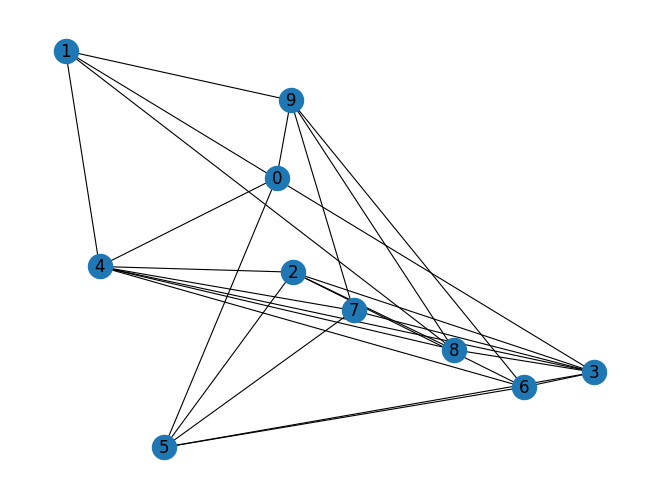

In [9]:
graph.data_graph()
graph.plot_graph()

Now, let's implement the algorithms to solve our problem : 

In [10]:
from collections import deque
import heapq
import math
import numpy as np


def dijkstra(self, start, end):
    distances = {node: float('inf') for node in self.graph.nodes}
    distances[start] = 0

    heap = [(0, start)]
    while heap:
        current_cost, current_node = heapq.heappop(heap)

        if current_node == end:
            break

        for neighbor in self.graph.neighbors(current_node):
            cost = self.graph[current_node][neighbor]['weight']
            new_cost = current_cost + cost
            if new_cost < distances[neighbor]:
                distances[neighbor] = new_cost
                heapq.heappush(heap, (new_cost, neighbor))

    path = reconstruct_path(graph, start, end, distances)

    return path, distances[end]


def reconstruct_path(self, start, end, distances):
    current_node = end
    path = [current_node]
    while current_node != start:
        neighbors = self.graph.neighbors(current_node)
        min_neighbor = None
        min_cost = float('inf')
        for neighbor in neighbors:
            cost = self.graph[current_node][neighbor]['weight']
            if distances[neighbor] + cost < min_cost:
                min_neighbor = neighbor
                min_cost = distances[neighbor] + cost
        path.append(min_neighbor)
        current_node = min_neighbor
    path.reverse()
    return path


def a_star(self, start, end):
    # Distances du point de départ à chaque nœud (g-cost)
    distances = {node: float('inf') for node in self.graph.nodes}
    distances[start] = 0

    # Estimations des coûts du point de départ à chaque nœud (f-cost)
    estimations = {node: heuristic(graph, node, end) for node in self.graph.nodes}

    # File de priorité pour l'exploration des nœuds
    heap = [(estimations[start], 0, start)]  # (f-cost, g-cost, node)

    # Dictionnaire pour stocker les nœuds précédents sur le chemin optimal
    came_from = {}

    while heap:
        _, current_cost, current_node = heapq.heappop(heap)

        if current_node == end:
            break

        for neighbor in self.graph.neighbors(current_node):
            cost = self.graph[current_node][neighbor]['weight']
            new_cost = current_cost + cost
            if new_cost < distances[neighbor]:
                distances[neighbor] = new_cost
                priority = new_cost + heuristic(graph, neighbor, end)
                heapq.heappush(heap, (priority, new_cost, neighbor))
                came_from[neighbor] = current_node

    path = reverse_path(start, end, came_from)

    return path, distances[end]


def heuristic(self, node, goal):
    # Heuristique utilisée pour estimer le coût restant (ici, distance euclidienne)
    pos1 = self.graph.nodes[node]['pos']
    pos2 = self.graph.nodes[goal]['pos']
    distance = math.sqrt((pos2[0] - pos1[0]) ** 2 + (pos2[1] - pos1[1]) ** 2)
    return distance


def reverse_path(start, end, came_from):
    current_node = end
    path = [current_node]
    while current_node != start:
        current_node = came_from[current_node]
        path.append(current_node)
    path.reverse()
    return path


def valeur_contenu(self, source, destination):
    if source != destination:
        return self.graph[source][destination]['weight']
    return float('inf')


def calculer_distance(chemin):
    distance_totale = 0

    for i in range(len(chemin) - 1):
        source = chemin[i]
        destination = chemin[i + 1]
        distance = valeur_contenu(graph, source, destination)
        distance_totale += distance

    return distance_totale


def tabou_search(solution_initiale, destination_finale, taille_tabou, iter_max):
    nb_iter = 0
    liste_tabou = deque(maxlen=taille_tabou)

    solution_courante = [solution_initiale]
    meilleurs_voisin = solution_courante
    meilleure_globale = solution_courante

    # Avoir une valeur élevée juste pour pouvoir comparer :
    valeur_meilleure_globale = float('inf')

    liste_tabou.append(solution_courante)

    while nb_iter < iter_max:
        valeur_meilleure = float('inf')

        # Parcours des voisins
        for voisin in voisinage(graph, solution_courante[-1], liste_tabou, destination_finale, solution_courante):
            valeur_to_voisin = valeur_contenu(graph, solution_courante[-1], voisin)
            # Selection du meilleur voisin
            if valeur_to_voisin < valeur_meilleure:
                meilleurs_voisin = voisin
            # Changement de la meilleure valeur pour continuer de comparer
            valeur_meilleure = valeur_contenu(graph, solution_courante[-1], voisin)

        # Permet de garder la valeur du chemin avec le dernier meilleur voisin
        if valeur_contenu(graph, solution_courante[-1], meilleurs_voisin) < valeur_meilleure_globale:
            meilleure_globale.append(meilleurs_voisin)
            if solution_courante[-1] != meilleurs_voisin:
                valeur_meilleure_globale = valeur_contenu(graph, solution_courante[-1], meilleurs_voisin)
            nb_iter = 0
        else:
            nb_iter += 1

        # Progression dans le graphe en prenant le meilleur voisin
        solution_courante = meilleure_globale
        liste_tabou.append(meilleurs_voisin)

        if solution_courante[-1] == destination_finale:
            break

    distance_meilleure_globale = calculer_distance(meilleure_globale)
    return meilleure_globale, distance_meilleure_globale


def voisinage(self, node, visited, destination_finale, solution_courante):
    voisins = []
    for v in self.graph.neighbors(node):
        if v not in visited or v == destination_finale:
            if v not in solution_courante:
                voisins.append(v)
    return voisins


def distance(point1, point2):
    return np.linalg.norm(np.array(point1) - np.array(point2))


def initialiser_pheromones(n):
    return np.ones((n, n))


def mettre_a_jour_pheromones(pheromones, chemin, cout_total, alpha, beta):
    n = pheromones.shape[0]
    if len(chemin) == n:
        for i in range(n):
            ville_courante = chemin[i]
            ville_suivante = chemin[(i + 1) % n]
            pheromones[ville_courante, ville_suivante] = (1 - alpha) * pheromones[ville_courante, ville_suivante] + alpha / cout_total
            pheromones[ville_suivante, ville_courante] = pheromones[ville_courante, ville_suivante]




def choisir_prochaine_ville(pheromones, visites, ville_courante, alpha, beta):
    n = pheromones.shape[0]
    max_phéromone = -1
    ville_suivante = -1
    for ville in range(n):
        if not visites[ville]:
            pheromone = pheromones[ville_courante, ville] * (1.0 / distance(ville_courante, ville) ** beta)
            if pheromone > max_phéromone:
                max_phéromone = pheromone
                ville_suivante = ville
    return ville_suivante


def colonie_de_fourmis(graph, start, end):

    #initialize variables
    nombre_fourmis = 10
    alpha = 1.0
    beta = 2.0
    evaporation = 0.5
    iterations = 100
    points = list(range(num_nodes))
    
    n = len(points)
    distances = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            distances[i, j] = distance(points[i], points[j])

    # Trouver les indices des points a et b
    indice_a = points.index(start)
    indice_b = points.index(end)

    pheromones = initialiser_pheromones(n)
    meilleur_chemin = None
    meilleur_cout = float('inf')


    for _ in range(iterations):
        for _ in range(nombre_fourmis):
            visites = [False] * n
            chemin = []
            cout_total = 0
            ville_courante = indice_a
            visites[ville_courante] = True
            chemin.append(ville_courante)

            while ville_courante != indice_b:
                ville_suivante = choisir_prochaine_ville(pheromones, visites, ville_courante, alpha, beta)
                visites[ville_suivante] = True
                chemin.append(ville_suivante)
                cout_total += distances[ville_courante, ville_suivante]
                ville_courante = ville_suivante

            cout_total += distances[ville_courante, chemin[0]]

            if cout_total < meilleur_cout:
                meilleur_chemin = chemin
                meilleur_cout = cout_total

            mettre_a_jour_pheromones(pheromones, chemin, cout_total, evaporation, 1)


    return meilleur_chemin, int(meilleur_cout)


print(colonie_de_fourmis(graph, start, end))
print(dijkstra(graph, start, end))
print(a_star(graph, start, end))
print(tabou_search(start, end, 10, 200))


([1, 0, 2, 3, 4, 5], 10)
([1, 9, 0, 5], 96)
([1, 9, 0, 5], 96)
([1, 4, 7, 5], 111)


Now let's create the objects and a function to determine the best route based on the lowest cost.

In [19]:
import itertools
import time
import random


def create_objects(max_entiers, max_valeur, start, end):
    if max_entiers > max_valeur - 2:
        raise ValueError("Le maximum d'entiers ne peut pas être supérieur à la différence entre max_valeur et 2")

    entiers = list(set(range(max_valeur)) - {start, end})
    entiers = random.sample(entiers, max_entiers)
    return entiers


def best_itinerary(points, start, end, method, size=30, iteration=200):
    print("---------------------------------------------------------")
    print(f"Looking for Best Path:")
    tic = time.perf_counter()

    best_objects_path = [start]
    chemin_global = []
    cout_meilleur_chemin = float('inf')

    for permutation in itertools.permutations(points):
        path_start, cout_start = dijkstra(graph, start, permutation[0])
        cout_total = cout_start

        paths = []
        paths.extend(path_start)

        for i in range(len(permutation) - 1):
            point_actuel = permutation[i]
            point_suivant = permutation[i + 1]
            match(method) :
                case 'tabou':
                        path, cout = tabou_search(point_actuel, point_suivant, size, iteration)
                case 'a*':
                        path, cout = a_star(graph, point_actuel, point_suivant)
                case 'colonie de foumis ':
                        path, cout = colonie_de_fourmis(graph, point_actuel, point_suivant)
                case other:
                        method = 'dijkstra'
                        path, cout = dijkstra(graph, point_actuel, point_suivant)
            cout_total += cout
            paths.extend(path)

        if cout_total < cout_meilleur_chemin:
            cout_meilleur_chemin = cout_total
            best_objects_path = list(permutation)
            chemin_global = paths[:]


    path_end, cout_end = dijkstra(graph, chemin_global[-1], end)
    chemin_global.extend(path_end)
    cout_meilleur_chemin += cout_end

    chemin_global = remove_consecutive_duplicates(chemin_global)
    toc = time.perf_counter()

    print(f"Objects Path: {best_objects_path}")
    print(f"Method: {method}")
    print(f"Path: {chemin_global}")
    print(f"Cost: {cout_meilleur_chemin}")
    print(f"Duration: {toc - tic:0.4f} seconds")
    print("---------------------------------------------------------")

    return best_objects_path, cout_meilleur_chemin, chemin_global


def remove_consecutive_duplicates(lst):
    result = [lst[0]]  # Ajouter le premier élément à la liste résultat

    for i in range(1, len(lst)):
        if lst[i] != lst[i - 1]:
            result.append(lst[i])  # Ajouter l'élément à la liste résultat s'il est différent du précédent

    return result


def base_itinerary_cost(self, path):
    distance_totale = 0

    for i in range(len(path) - 1):
        source = path[i]
        destination = path[i + 1]
        _, distance = self.dijkstra(source, destination)
        distance_totale += distance

    return distance_totale

### 2 - Demonstration of this implementation on multiple cases

##### Case I :

Let's try with 10 nodes and 2 objects :

---------------------------------------------------------
Looking for Best Path:
Objects Path: [6, 3]
Method: dijkstra
Path: [1, 9, 6, 3, 1]
Cost: 199
Duration: 0.0005 seconds
---------------------------------------------------------
---------------------------------------------------------
Looking for Best Path:
Objects Path: [3, 6]
Method: tabou
Path: [1, 3, 6, 9, 1]
Cost: 199
Duration: 0.0005 seconds
---------------------------------------------------------
---------------------------------------------------------
Looking for Best Path:
Objects Path: [6, 3]
Method: a*
Path: [1, 9, 6, 3, 1]
Cost: 199
Duration: 0.0005 seconds
---------------------------------------------------------
---------------------------------------------------------
Looking for Best Path:
Objects Path: [6, 3]
Method: dijkstra
Path: [1, 9, 6, 3, 1]
Cost: 199
Duration: 0.0004 seconds
---------------------------------------------------------


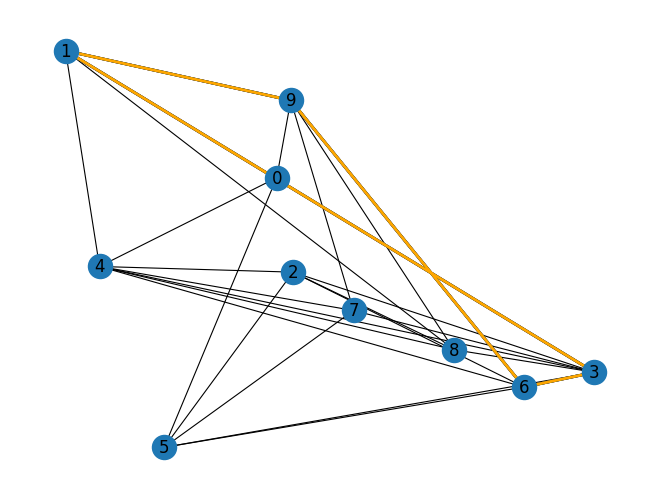

In [21]:
# Générer la liste d'objets (sommets à visiter)
obj = create_objects(2, num_nodes, start, end)

# Détermine le meilleur chemin qui passe par les points générés
path, cost, chemin_g = best_itinerary(obj, start, start, 'dijkstra')
path2, cost2, chemin_g2 = best_itinerary(obj, start, start, 'tabou')
path3, cost3, chemin_g3 = best_itinerary(obj, start, start, 'a*')
path4, cost4, chemin_g4 = best_itinerary(obj, start, start, 'colonie de foumis')
graph.plot_graph([chemin_g, chemin_g2, chemin_g3, chemin_g4], ['red', 'blue', 'green', 'orange'])


##### Case II :

Let's try with 2000 nodes and 2 objects:

In [22]:
# Nombre maximum de sommets
num_nodes = 2000
# Nombre maximum d'arretes par sommet
max_edges_per_node = 5

graph = Graph(num_nodes, max_edges_per_node)

# Point de départ
start = 1

---------------------------------------------------------
Generating Graph with 2000 nodes
Generation done in 0.0517 seconds
---------------------------------------------------------


In [25]:
# Générer la liste d'objets (sommets à visiter)
obj = create_objects(2, num_nodes, start, end)

# Détermine le meilleur chemin qui passe par les points générés
graph.data_graph()
path, cost, chemin_g = best_itinerary(obj, start, start, 'dijkstra')
path2, cost2, chemin_g2 = best_itinerary(obj, start, start, 'tabou', 2000, 10000)
path3, cost3, chemin_g3 = best_itinerary(obj, start, start, 'a*')
path4, cost4, chemin_g4 = best_itinerary(obj, start, start, 'colonie de fourmis') #doesn't show in the output

Node : 0
[{548: 80}, {820: 87}, {1930: 92}]
Node : 1
[{260: 57}, {477: 98}, {729: 38}]
Node : 2
[{1451: 42}, {1478: 101}, {293: 51}, {323: 42}, {447: 19}, {1350: 71}]
Node : 3
[{1825: 24}, {937: 51}, {139: 37}, {519: 99}, {1962: 81}]
Node : 4
[{1825: 79}, {774: 75}]
Node : 5
[{1210: 76}, {1645: 36}, {962: 84}, {1352: 83}, {1438: 43}]
Node : 6
[{1015: 44}, {1703: 4}, {1712: 25}, {930: 78}]
Node : 7
[{1305: 83}, {359: 81}, {1194: 53}, {318: 98}]
Node : 8
[{952: 12}, {487: 18}, {341: 30}, {153: 11}, {378: 58}, {416: 56}, {922: 7}]
Node : 9
[{1712: 71}, {100: 26}, {475: 26}, {1310: 67}, {1348: 81}, {1358: 63}]
Node : 10
[{1055: 66}, {1982: 55}, {1561: 43}, {49: 35}, {260: 25}, {273: 16}, {298: 37}, {756: 37}, {1108: 52}, {1220: 43}]
Node : 11
[{1607: 39}, {1769: 77}, {1262: 73}, {627: 72}, {901: 98}]
Node : 12
[{1885: 18}, {1383: 44}, {1227: 37}, {880: 36}, {1983: 46}]
Node : 13
[{1926: 26}, {1654: 67}, {564: 10}, {51: 17}, {208: 53}, {530: 57}, {1871: 49}, {1969: 30}]
Node : 14
[{1915: 16

Objects Path: [1521, 1789]
Method: tabou
Path: [1, 729, 1407, 663, 1792, 1942, 1521, 1942, 1850, 1804, 1872, 727, 1382, 727, 1777, 483, 1422, 260, 1]
Cost: 505
Duration: 0.7550 seconds
---------------------------------------------------------
---------------------------------------------------------
Looking for Best Path:
Objects Path: [1789, 1521]
Method: a*
Path: [1, 729, 934, 1910, 504, 1789, 504, 1765, 502, 509, 136, 1154, 1521, 1942, 1792, 663, 1407, 729, 1]
Cost: 445
Duration: 0.0637 seconds
---------------------------------------------------------
---------------------------------------------------------
Looking for Best Path:
Objects Path: [1789, 1521]
Method: dijkstra
Path: [1, 729, 934, 1910, 504, 1789, 504, 1765, 502, 509, 136, 1154, 1521, 1942, 1792, 663, 1407, 729, 1]
Cost: 445
Duration: 0.0455 seconds
---------------------------------------------------------


### 3 - Comprehensive experimental design demonstrating your algorithm’s performance (rename)

#### a - Performances

This algorithm have many interesing features which are important or interesing for solving our problem.


In [ ]:
#code pour le temps d'éxecution

#### b - Limitations

All algorithms aren't perfect, they have flaws and ours don't fall under the rule.


#### c - Prospects for improvements

Even if this algorithm isn't perfect, it is still possible to improve it. In order to transform this algorithm we got some ideas :

-
-
-